# Research on online strore Ice

Ice is an online store which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.  
We need to identify patterns that determine whether a game succeeds or not.  
This will allow us to spot potential big winners and plan advertising campaigns.

<b>Our goal is to plan advertising campaigns according to successful games</b>


##  Open the data file and study the general information

In [1]:
import pandas as pd
import re
import numpy as np
from IPython.core.display import display, HTML
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#Resize notebook width
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Read data from CSV file
try:
    games_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
  print("An exception occurred will reading csv file")

In [4]:
#Explorer the data
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#General information
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Check for  missing values
games_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Check for  missing values and calculate there percentage
missing_values_report = games_data.isna().sum().to_frame()
missing_values_report = missing_values_report.rename(columns = {0: 'missing_values'})
missing_values_report['% of total'] = (missing_values_report['missing_values'] / games_data.shape[0]).round(2)
missing_values_report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


In [8]:
#Check for duplicates
games_data.duplicated().sum()

0

####  Conclusion

1. 'year_of_release' if of type float  and should be int
2. 'User_Score' if of type object  and should be float according to documentation should be maximum of 10
3. There are missing values that should be fix in the following fields: 
    - year_of_release - 269(2%)  missing values  
    - genre - 2 missing values
    - name - 2 missing values
    - critic_score - 8578(51%) missing values
    - user_score - 6701(40%) missing values
    - rating - 6766(40%) missing values
4. There are NO duplicate values

##  Data preprocessing

###  Processing missing values

In [9]:
#Replace the columns name to lower case
games_data.columns = games_data.columns.str.lower()

In [10]:
#'name' rows with null
games_data[games_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Delete rows with name=NaN.there are only 2 rows and they are without score and have only few sales
games_data.drop(games_data[games_data['name'].isnull()].index, inplace=True)

In [12]:
#games_data.loc[games_data['critic_score'].isnull(),'critic_score'] = games_data.loc[games_data['critic_score'].isnull(),'critic_score'].fillna(0)

#Fill missing values withmedian value grouped by 'platform' & 'genre'
games_data['critic_score'] = games_data.critic_score.fillna(games_data.groupby(['platform','genre'])['critic_score'].transform('median'))

#There are still 1132 rows with NaN value so we'll group it only by 'genre'
games_data['critic_score'] = games_data.critic_score.fillna(games_data.groupby('genre')['critic_score'].transform('median'))

In [13]:
#Fill missing values with 0
#games_data.loc[games_data['user_score'].isnull(),'user_score'] = games_data.loc[games_data['user_score'].isnull(),'user_score'].fillna(0)

#Replace 'user_score'  'tbd' value to NaN
#tbd= to be determined - meaning that there is still no score
games_data.user_score.replace('tbd',  np.NaN, inplace=True)

#Replace data type to float
#In order to execute the filling missing values step we'll change the type here.
#we cant execute  transform('median')on object data type
#value should be  maximum of 10
games_data['user_score'] = games_data['user_score'].astype(float)

#Fill missing values withmedian value grouped by 'platform' & 'genre'
games_data['user_score'] = games_data.user_score.fillna(games_data.groupby(['platform','genre'])['user_score'].transform('median'))

#There are still 1125 rows with NaN value so we'll group it only by 'genre'
games_data['user_score'] = games_data.user_score.fillna(games_data.groupby('genre')['user_score'].transform('median'))

In [14]:
#Fill missing values with 'rp' (rating pending)
games_data.loc[games_data['rating'].isnull(),'rating'] = games_data.loc[games_data['rating'].isnull(),'rating'].fillna('unknown')

In [15]:
#There is no such rating exist!! 
#Check how many rows exist with 'K-A'rating
games_data[games_data['rating'] == 'K-A']['name'].count()
#Change 'K-A' to 'RP'
games_data.rating.replace('K-A','unknown',inplace=True)


In [16]:
#There is no such rating exist!! 
#Check how many rows exist with 'EC'rating
games_data[games_data['rating'] == 'EC']['name'].count()
#Change 'K-A' to 'RP'
games_data.rating.replace('EC','unknown',inplace=True)
#Check rating values to varify that only legןt values exist
games_data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

In [17]:
#games_data[games_data['year_of_release'].isnull()]['name'].transform(lambda name: re.search('\d{4}', name))

#Check if 'name' contains year in 4 digits pattern
#if yes return the year and fill missing value in 'year_of_release' column
def get_year_from_name(name):
    
    year = re.search('\d{4}',name)
    if year:
        return year.group()

games_data.loc[games_data['year_of_release'].isnull(),'year_of_release']  = games_data.loc[games_data['year_of_release'].isnull(),'name'].apply(get_year_from_name)
#Drop rows were 'year_of_release' is null
games_data.dropna(subset=['year_of_release'],inplace=True)

There are still 252 rows with null values on 'year_of_release' column
There total sales are very low
the percentage of then is 1.5% , so we can delete them

###  Data type replacement

In [18]:
#Replace 'year_of_release' data type to int16 -it contains only 4 digits si int16 is enought
games_data['year_of_release'] = games_data['year_of_release'].astype(np.int16)

In [19]:
#check changes
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int16  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  float64
 10  rating           16461 non-null  object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


In [20]:
#Calculate total sales for each game
games_data['total_sales'] = games_data[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis=1)
games_data.sort_values('total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.80,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.0,7.80,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,73.5,7.00,T,0.01
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,64.0,7.80,unknown,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,65.5,7.30,unknown,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,76.5,6.70,unknown,0.00


###  Conclusion

1. Delete rows were 'name' equal NaN - there are 2 rows. the rows without score and has only few sales
2. 'critic_score' with NaN fiiled with median value that grouped by 'platform' & 'genre'
3. 'user_score' with NaN fiiled with median value that grouped by 'platform' & 'genre'
4. 'rating' with NaN value were replaced to 'unknown' (Rating pending).
5. 'user_score', 'critic_score', 'rating' missing can be exist for those reasons:
    - The data supplyed is not updated 
    - There are games that are not popular and has minimal sales, so they are not been scored and rated
6. 'year_of_release' missing values can be exist for those reasons:
    - The data supplyed is not updated 
    - There are games that are not popular and has minimal sales, so nobody care about then 
7. In order to get more accurate data about  'year_of_release', we differentiate that in some rows, the 'name' column contains the year of release.
    so we took the value from there. for other rows (252 rows) we droped the rows
8. There is no such ratings exist 'K-A' and 'EC' so we replaced it to 'RP'.
   link to esrb rating Categories https://www.esrb.org/ratings-guide/

##  Analyze the data 

###  How many games were released in different years

Text(0, 0.5, 'number of games')

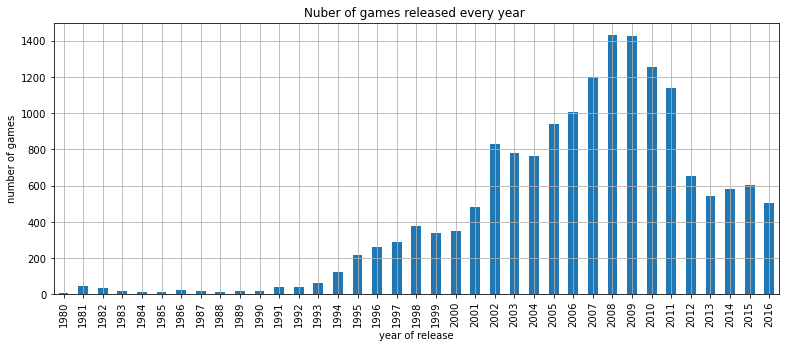

In [21]:
#Number of games releases each year
year_release = games_data.groupby('year_of_release')['name'].count().reset_index()
#year_release.sort_values(ascending=False)
year_release.plot(x='year_of_release',y='name',kind='bar', grid=True, figsize=(13,5),style='o', legend=None,title='Nuber of games released every year ');
plt.xlabel('year of release')
plt.ylabel('number of games')


#### Conclusion

The data for every period is not significant.
The majority of data is since 2002

### How sales varied from platform to platform

In [22]:
 #Show Sales for each platform
platform_total_sales = games_data.pivot_table(
    index='platform',
    values=['na_sales','eu_sales','jp_sales','other_sales'], 
    aggfunc='sum')
#Calculate total sales for each game
platform_total_sales['total_sales'] = platform_total_sales[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis=1)
#Sort platformsby total_sales
platform_total_sales.sort_values('total_sales',ascending=False,inplace=True)
platform_total_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PS2,337.00,137.63,580.30,192.35,1247.28
X360,268.37,12.30,595.74,84.89,961.30
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.02,380.32,59.04,802.79
PS,212.39,139.78,334.72,40.69,727.58
PS4,141.09,15.96,108.74,48.35,314.14
GBA,74.59,46.56,184.12,7.61,312.88
PSP,65.95,76.14,107.32,40.93,290.34


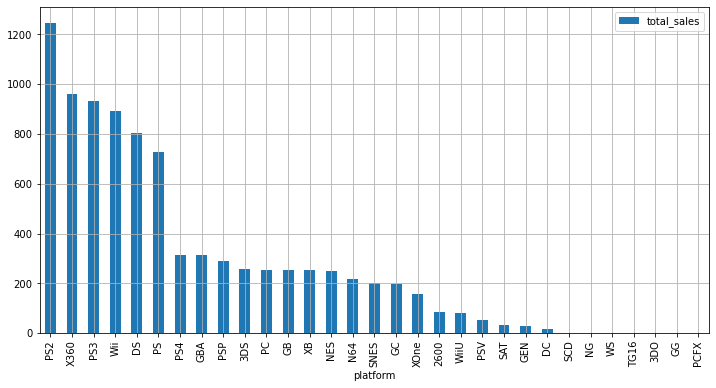

In [23]:
#graph that shows for each platform the total sales
platform_total_sales.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o');

In [24]:
platform_total_sales['sales_z'] = (platform_total_sales['total_sales'] - platform_total_sales['total_sales'].mean() ) / platform_total_sales['total_sales'].std()
platform_total_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales,sales_z
platform,,,,,,
PS2,337.00,137.63,580.30,192.35,1247.28,2.787836
X360,268.37,12.30,595.74,84.89,961.30,1.959438
PS3,327.21,79.41,390.13,134.59,931.34,1.872653
Wii,258.32,68.28,486.87,77.71,891.18,1.756322
DS,188.41,175.02,380.32,59.04,802.79,1.500282
PS,212.39,139.78,334.72,40.69,727.58,1.282422
PS4,141.09,15.96,108.74,48.35,314.14,0.084811
GBA,74.59,46.56,184.12,7.61,312.88,0.081161
PSP,65.95,76.14,107.32,40.93,290.34,0.015869


The first 6 games have the greatest total sales,and thay are above the std value so we are going to analyze them.   
The games are:PS2, X360, PS3, Wii, DS, PS

Text(0, 0.5, 'total sales')

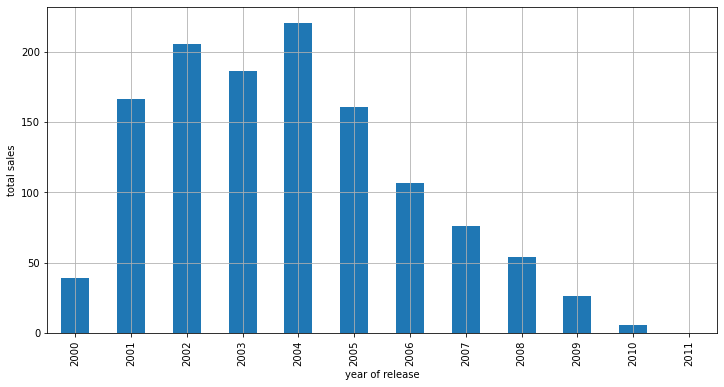

In [25]:
#Get only PS2 platform games
PS2_platform = games_data.query("platform == 'PS2' ")
PS2_sales_by_year = PS2_platform.pivot_table(
        index='year_of_release',
        values=['na_sales','eu_sales','jp_sales','other_sales'], 
        aggfunc='sum'
        )
PS2_sales_by_year['total_sales'] = PS2_sales_by_year[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis=1)
PS2_sales_by_year.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o',legend=None);
plt.xlabel('year of release')
plt.ylabel('total sales')

For PS2 platform It took 1 years to appear and 6 years to fade

Text(0, 0.5, 'total sales')

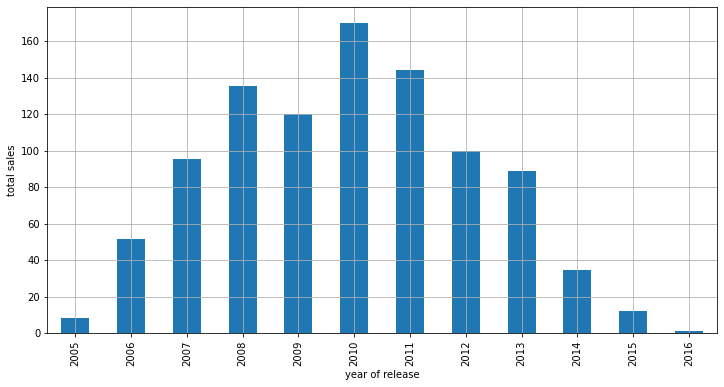

In [26]:
#Get only X360 platform games
X360_platform = games_data.query("platform == 'X360' ")
X360_sales_by_year = X360_platform.pivot_table(
        index='year_of_release',
        values='total_sales', 
        aggfunc='sum'
        )
X360_sales_by_year.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o',legend=None);
plt.xlabel('year of release')
plt.ylabel('total sales')

For X360 platform It took 2 years to appear and 7 years to fade

Text(0, 0.5, 'total sales')

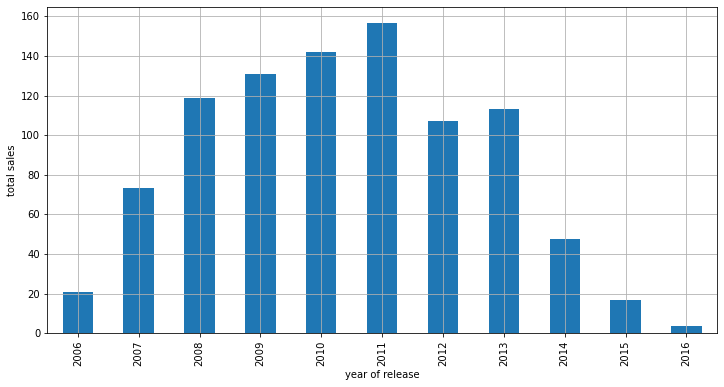

In [27]:
#Get only PS3 platform games
PS3_platform = games_data.query("platform == 'PS3' ")
PS3_sales_by_year = PS3_platform.pivot_table(
        index='year_of_release',
        values='total_sales', 
        aggfunc='sum'
        )
PS3_sales_by_year.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o',legend=None);
plt.xlabel('year of release')
plt.ylabel('total sales')

For PS3 platform It took 1 years to appear and 7 years to fade

Text(0, 0.5, 'total sales')

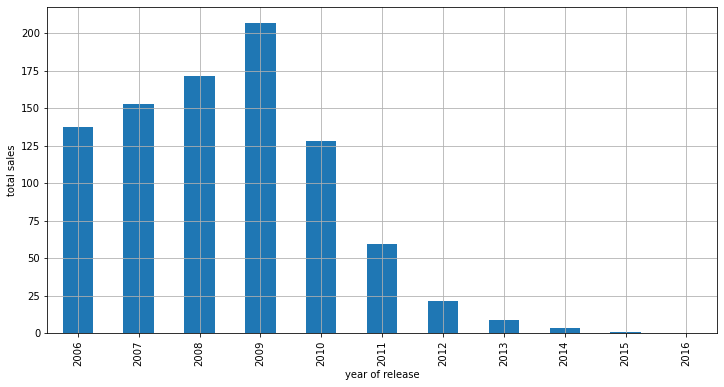

In [28]:
#Get only Wii platform games
Wii_platform = games_data.query("platform == 'Wii' ")
Wii_sales_by_year = Wii_platform.pivot_table(
        index='year_of_release',
        values='total_sales', 
        aggfunc='sum'
        )

Wii_sales_by_year.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o',legend=None);
plt.xlabel('year of release')
plt.ylabel('total sales')

For Wii platform It took 0 years to appear and 5 years to fade

Text(0, 0.5, 'total sales')

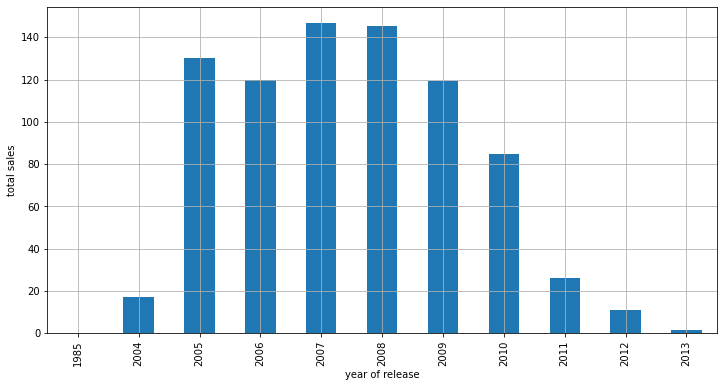

In [29]:
#Get only DS platform games
DS_platform = games_data.query("platform == 'DS' ")
DS_sales_by_year = DS_platform.pivot_table(
        index='year_of_release',
        values='total_sales', 
        aggfunc='sum'
        )
DS_sales_by_year.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o', legend=None);
plt.xlabel('year of release')
plt.ylabel('total sales')

For DS platform It took 2 years to appear and 6 years to fade

Text(0, 0.5, 'total sales')

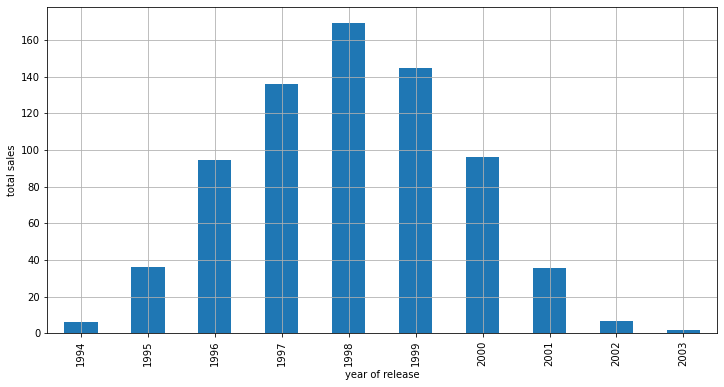

In [30]:
#Get only PS platform games
PS_platform = games_data.query("platform == 'PS' ")
PS_sales_by_year = PS_platform.pivot_table(
        index='year_of_release',
        values='total_sales', 
        aggfunc='sum'
        )
PS_sales_by_year.plot(y='total_sales',kind='bar', grid=True, figsize=(12,6),style='o',legend=None);
plt.xlabel('year of release')
plt.ylabel('total sales')

For PS platform It took 2 years to appear and 5 years to fade

###  Determine what period to  take data for

Text(0, 0.5, 'Number of games released every year')

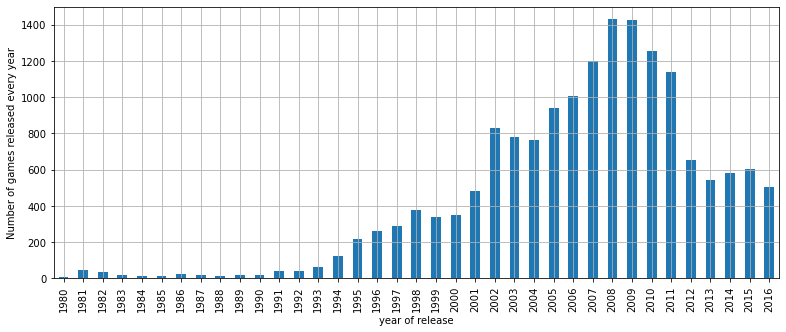

In [31]:
#Number of games releases each year
year_release = games_data.groupby('year_of_release')['name'].count().reset_index()
#year_release.sort_values(ascending=False)
year_release.plot(x='year_of_release',y='name',kind='bar', grid=True, figsize=(13,5),style='o',legend=None);
plt.xlabel('year of release')
plt.ylabel('Number of games released every year')

In [32]:
#Filter data from 2012 only
games_data_filtered = games_data.query('year_of_release >= 2012')
games_data_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,76.0,6.90,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74.0,7.80,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.30,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.60,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,81.0,8.05,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.20,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.60,unknown,0.01


#### Conclusion

According to this graph's that it take around 5 years for a patform to fade
So we will work only with data from 2012

###  Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [33]:
games_data_filtered_pivot = games_data_filtered.pivot_table(
                    index='platform',                    
                    values='total_sales',
                    aggfunc='sum'
                        )
games_data_filtered_pivot.sort_values('total_sales',ascending=False,inplace=True)
games_data_filtered_pivot


,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,63.00
PSV,49.18
Wii,35.37


Text(0, 0.5, 'total sales')

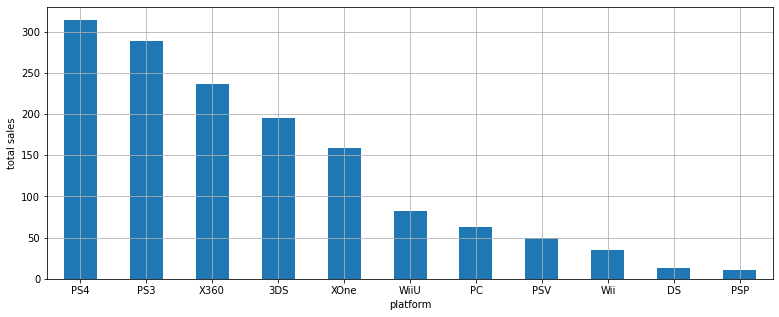

In [34]:
games_data_filtered_pivot.plot(y='total_sales',kind='bar', grid=True, figsize=(13,5),style='o',rot=0, legend=None);
plt.xlabel('platform')
plt.ylabel('total sales')

Since 2012 the platforms that are leading in sales are: PS4,PS3, X360, 3DS, Xone

In [35]:
#
filtered_total_sales_by_year = games_data_filtered.pivot_table(
                    index='platform', 
                    columns='year_of_release',
                    values='total_sales',
                    aggfunc='sum',
                    fill_value=0
                        )
#Check diffences between years
difference_between_years = filtered_total_sales_by_year - filtered_total_sales_by_year.shift(+1, axis=1)
difference_between_years

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,NaN,5.21,-12.81,-15.98,-12.64
DS,NaN,-9.47,-1.54,0.00,0.00
PC,NaN,-10.49,0.55,-4.76,-3.27
PS3,NaN,5.89,-65.49,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.55,-2.90,-0.12,-0.12
PSV,NaN,-5.60,1.31,-5.65,-2.00
Wii,NaN,-13.12,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


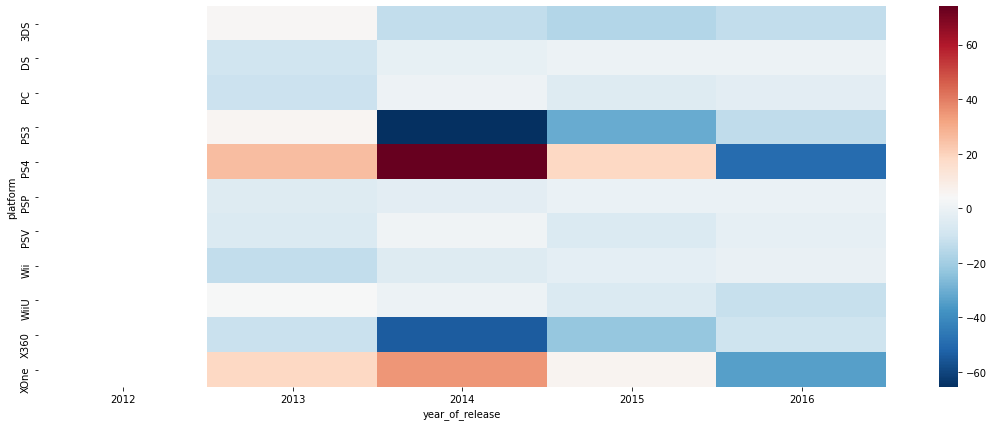

In [36]:
#heatmap shows the total sales in years
plt.figure(figsize=(19,7))
sns.heatmap(difference_between_years, cmap='RdBu_r');


In [37]:
#Get top profitable platforms
top_profitable_platforms = games_data_filtered_pivot.query('total_sales > 150').reset_index()
top_profitable_platforms

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


#### Conclusion

Platforms that shrinked during the years are:PS4, Xone    
Platform that grow during the years are: X360, PS3  
profitable platforms: PS4, PS3, X360, 3DS, XOne

###   Build a box plot for the global sales of all games, broken down by platform

In [38]:
#Explorer the data
filtered_total_sales_by_year

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,0.00,0.00,0.00
PC,23.22,12.73,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,0.00
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Text(0, 0.5, 'Total sales')

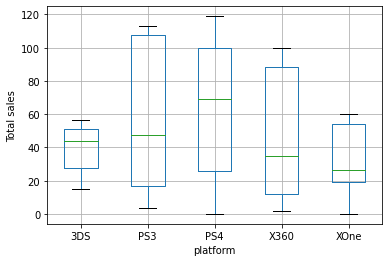

In [39]:
#filter the data to the most profitble platforms
filtered_total_sales_by_year = filtered_total_sales_by_year.query("platform in ('PS4', 'PS3', 'X360', '3DS', 'XOne')")
filtered_total_sales_by_year.T.boxplot();
plt.xlabel('platform')
plt.ylabel('Total sales')

In [40]:
#Calculate the mean
top_profitable_platforms_mean = top_profitable_platforms['total_sales'].mean()
#Add column 'distance_from_mean' for each platform sales
top_profitable_platforms['distance_from_mean'] = top_profitable_platforms['total_sales'] - top_profitable_platforms_mean
top_profitable_platforms

,platform,total_sales,distance_from_mean
0,PS4,314.14,75.46
1,PS3,288.79,50.11
2,X360,236.54,-2.14
3,3DS,194.61,-44.07
4,XOne,159.32,-79.36


#### Conclusion

The differences in sales are not  significant.
There are no outlires  
The distance_from_mean is almost the same 

###  How user and professional reviews affect sales

In [41]:
#Check correlation between sales and critic_score and user_score
def score_effect_sales(platform):
    platform_data = games_data_filtered.query('platform == @platform')
    
    #plot graph  sales and critic_score
    platform_data.plot(y='total_sales', x='critic_score', kind='scatter', label=platform);
    plt.xlabel('critic score')
    plt.ylabel('Total sales')
    #plot graph  sales and critic_score
    platform_data.plot(y='total_sales', x='user_score', kind='scatter',label=platform);
    plt.xlabel('User score')
    plt.ylabel('Total sales')
    #Check correlation between sales and critic_score
    sales_critic_score_corr = platform_data['total_sales'].corr(platform_data['critic_score'])
    
    #Check correlation between sales and user_score
    sales_user_score_corr = platform_data['total_sales'].corr(platform_data['user_score'])
    
    print(platform,'platform')
    if sales_critic_score_corr >= 0.5:
        print('correlation value is {} - There is a correlation between sales and critic score'.format(sales_critic_score_corr))
    else:
        print('correlation value is {} - There is NOT a correlation between sales and critic score'.format(sales_critic_score_corr))
        
    if sales_user_score_corr >= 0.5:
        print('correlation value is {} - There is a correlation between sales and user score'.format(sales_user_score_corr))
    else:
        print('correlation value is {} - There is NOT a correlation between sales and user score'.format(sales_user_score_corr))
    


PS4 platform
correlation value is 0.3347689328109688 - There is NOT a correlation between sales and critic score
correlation value is -0.07203316554802212 - There is NOT a correlation between sales and user score
PS3 platform
correlation value is 0.2978991626143336 - There is NOT a correlation between sales and critic score
correlation value is -0.0570408039276526 - There is NOT a correlation between sales and user score
X360 platform
correlation value is 0.33851809516010767 - There is NOT a correlation between sales and critic score
correlation value is -0.021501277231634853 - There is NOT a correlation between sales and user score
3DS platform
correlation value is 0.245918307421983 - There is NOT a correlation between sales and critic score
correlation value is 0.17434389027483982 - There is NOT a correlation between sales and user score
XOne platform
correlation value is 0.33155145507232087 - There is NOT a correlation between sales and critic score
correlation value is -0.074023988

0    None
1    None
2    None
3    None
4    None
Name: platform, dtype: object

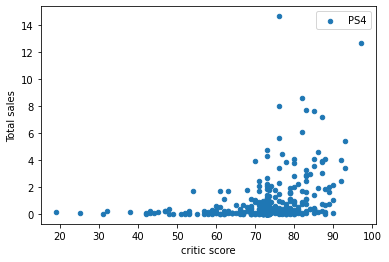

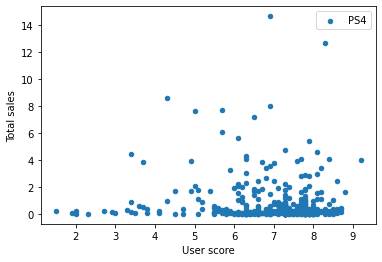

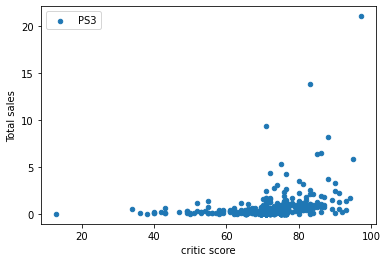

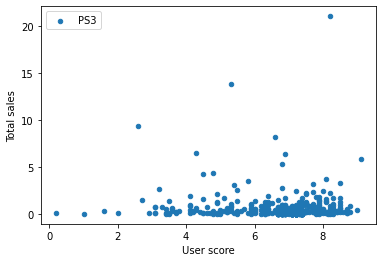

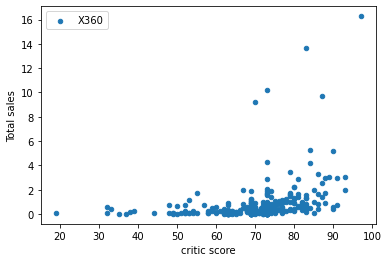

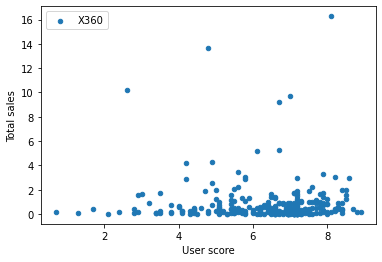

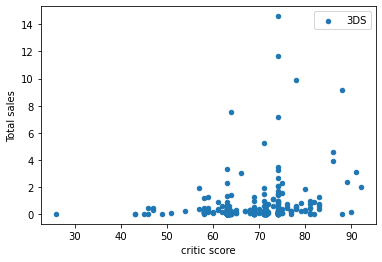

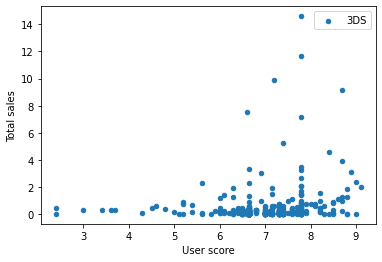

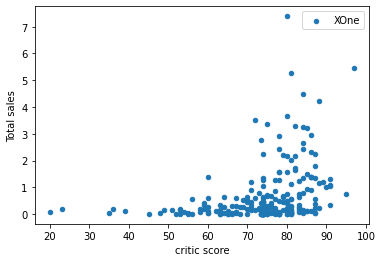

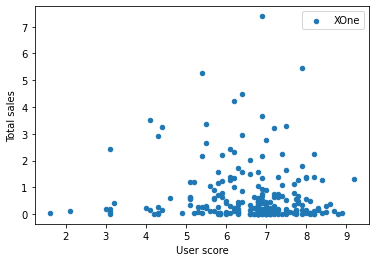

In [42]:
#Check sales and reviews  correlation on platforms

top_profitable_platforms['platform'].apply(score_effect_sales)

#### Conclusion

There is'nt correlation between user and professional reviews and sales

###  general distribution of games by genre

Text(0, 0.5, 'Total sales')

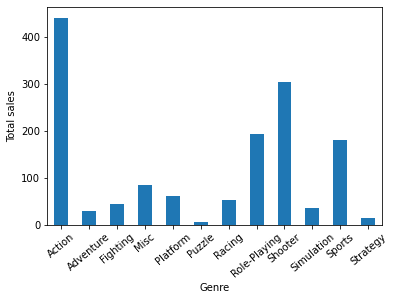

In [43]:
total_sales_by_genre = games_data_filtered.pivot_table(index='genre', values='total_sales', aggfunc='sum')
total_sales_by_genre.sort_values('total_sales',ascending=False)
total_sales_by_genre.plot(kind='bar',rot=40, legend=None);
plt.xlabel('Genre')
plt.ylabel('Total sales')

The most popular genres are:Action, Shooter, Role-Playing , Sports

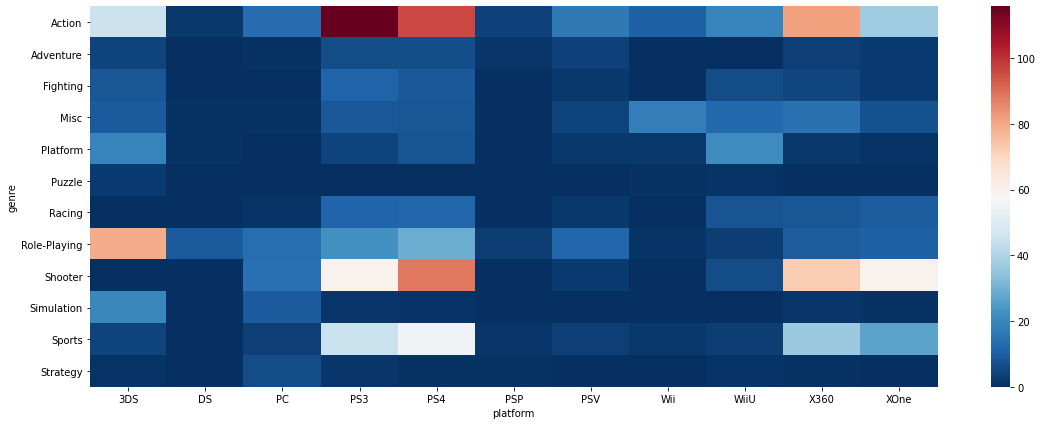

In [44]:
genre_total_sales_by_platform = games_data_filtered.pivot_table(
    index='genre',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0)

#heatmap shows the distribution by genre
plt.figure(figsize=(19,7))
sns.heatmap(genre_total_sales_by_platform, cmap='RdBu_r');

In [45]:
#Calculate total sale for genre
genre_total_sales_by_platform['total sales'] = genre_total_sales_by_platform.sum(axis=1)
#Calculate mean
genre_total_sales_mean = genre_total_sales_by_platform['total sales'].mean()
#Calculate distance from mean 
genre_total_sales_by_platform['distance_from_mean'] = genre_total_sales_by_platform['total sales'] - genre_total_sales_mean
genre_total_sales_by_platform.sort_values('distance_from_mean', ascending=False)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,total sales,distance_from_mean
genre,,,,,,,,,,,,,
Action,45.49,1.82,13.49,115.75,96.10,3.76,16.33,10.75,19.07,81.60,37.31,441.47,320.896667
Shooter,0.13,0.00,14.27,60.39,88.56,0.00,2.34,0.00,6.01,72.70,60.33,304.73,184.156667
Role-Playing,79.30,9.08,13.65,22.62,28.99,2.81,12.05,1.06,2.89,9.80,10.55,192.80,72.226667
Sports,4.23,0.11,3.26,44.84,55.61,1.41,3.21,2.11,3.16,36.39,26.74,181.07,60.496667
Misc,9.45,0.48,0.73,8.88,8.19,0.41,4.32,17.86,12.46,14.83,7.43,85.04,-35.533333
Platform,19.11,0.69,0.14,4.26,7.69,0.00,2.26,2.25,21.53,2.14,0.93,61.00,-59.573333
Racing,0.28,0.00,1.23,11.56,12.14,0.00,2.21,0.01,7.87,8.41,9.79,53.50,-67.073333
Fighting,8.46,0.00,0.12,11.00,8.65,0.36,2.21,0.00,6.27,4.97,2.45,44.49,-76.083333
Simulation,19.93,0.21,9.22,1.78,1.23,0.06,0.05,0.22,0.20,1.53,0.69,35.12,-85.453333


The most profitable genres have high sales on the following platforms: PS3, PS4, X360,XOne,3DS which are the most popular platforms

In [46]:
genre_num_of_games = games_data_filtered.pivot_table(index='genre', values='name', aggfunc='count')
genre_num_of_games.sort_values('name',ascending=False)

,name
genre,
Action,1032
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


The most profitable genres have high number of games

### Conclusion

The most popular genres are:Action, Shooter, Role-Playing , Sports   
The most profitable genres have high sales on the following platforms: PS3, PS4, X360,XOne,3DS which are the most popular platforms  
The most profitable genres have high number of games and there sales are higher than the mean 

##  Create a user profile for each region

###   top five platforms

In [47]:
region_profile = games_data_filtered.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
region_profile.T

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
eu_sales,42.64,3.53,38.01,106.86,141.09,0.42,11.36,11.92,25.13,74.52,51.59
jp_sales,87.79,3.72,0.00,35.29,15.96,10.47,21.04,3.39,13.01,1.57,0.34
na_sales,55.31,4.59,19.18,103.38,108.74,0.13,10.98,17.45,38.10,140.05,93.12


Text(0.5, 0, 'Total sales')

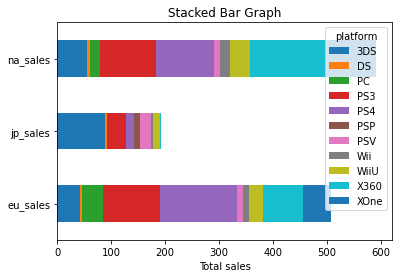

In [48]:
# plot a Stacked Bar Chart using matplotlib
region_profile.T.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True);

plt.xlabel('Total sales')

### Conclusion

Top 5 platform in eu: PS4, PS3, X360, XOne, 3DS  
Top 5 platform in jp: 3DS,PS3,PSV,PS4, PSP  
Top 5 platform in na:X360,PS4, PS3, XOne, 3DS  
3DS is the most popular in Japan while its less popular in other regions
XOne and X360 are popular in North america and europe but not popular in Japan 
platforms that are popular in all regions- 3DS,PS3,PS4

###  The top five genres

In [49]:
genre_profile = games_data_filtered.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
genre_profile.T

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
eu_sales,159.59,9.46,10.79,26.32,21.41,1.40,27.29,48.53,113.47,14.55,69.09,5.17
jp_sales,52.80,8.24,9.44,12.86,8.63,2.14,2.50,65.44,9.23,10.41,8.01,2.88
na_sales,177.90,8.92,19.79,38.19,25.38,1.13,17.22,64.00,144.77,7.97,81.53,4.23


Text(0.5, 0, 'Total sales')

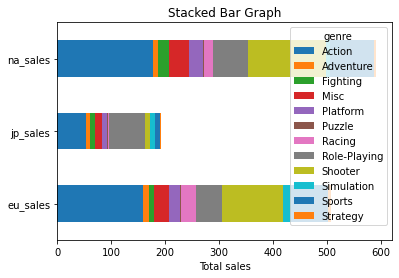

In [50]:
# plot a Stacked Bar Chart using matplotlib
genre_profile.T.plot(
  
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True);

plt.xlabel('Total sales')

#### Conclusion

Top 5 geners in eu: Action, Sports, Shooter, Misc, Racing  
Top 5 geners in jp: Role-Playing, Action, Misc, Sport, Fighting  
Top 5 geners in na: Action, Sport, Shooter, Misc, Role-Playing  
In North-Ameriva and europe the most popular ganere is Action while in Japan is Role-Playing. The change is due to cultural differences

###  Do ESRB ratings affect sales in individual regions? 

In [51]:
ESRB_profile = games_data_filtered.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
ESRB_profile.T

rating,E,E10+,M,T,unknown
eu_sales,113.03,55.37,194.21,52.96,91.50
jp_sales,28.33,8.19,21.20,26.02,108.84
na_sales,114.37,75.70,231.63,66.02,103.31


Text(0.5, 0, 'Total sales')

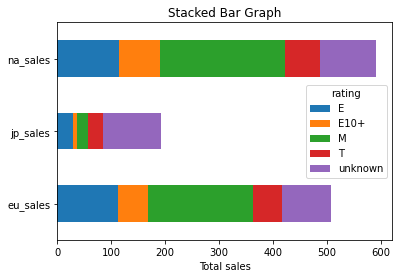

In [52]:
# plot a Stacked Bar Chart using matplotlib
ESRB_profile.T.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True);

plt.xlabel('Total sales')

#### Conclusion

1. AO(Adults only) doesnt have sales in all regions
2. Games without rating have a lot of sales in all regions
3. rating does'nt affect sales

##  Test  hypotheses

###  Average user ratings of the Xbox One and PC platforms are the same.

1. null hypothesis H₀ - "Average user ratings of the Xbox One and PC platforms are the same."
2. alternative hypothesis H₁ - "Average user ratings of the Xbox One and PC platforms are different."

In [53]:
Xbox_rating = games_data_filtered.query("platform == 'XB'")['user_score']
PC_rating = games_data_filtered.query("platform == 'PC'")['user_score']


In [54]:
#Check hypothesis
hypothesis_results = st.ttest_ind(Xbox_rating, PC_rating,equal_var= False)
alpha = 0.01

print('p-value:',hypothesis_results.pvalue)
if (hypothesis_results.pvalue < alpha):
    print("We reject the null hypothesis H₀ - Average user ratings of the Xbox One and PC platforms are NOT the same. ")
else:
    print("We can't reject the null hypothesis - Average user ratings of the Xbox One and PC platforms are the same.")

p-value: nan
We can't reject the null hypothesis - Average user ratings of the Xbox One and PC platforms are the same.


 I chose to use alpha = 0.01 because p-value is closer to 0.01 so i want to be more accurate

###  Average user ratings for the Action and Sports genres are different.

1. null hypothesis H₀ - "Average user ratings for the Action and Sports genres are the same."
2. alternative hypothesis H₁ - "Average user ratings for the Action and Sports genres are different."

In [55]:
action_rating = games_data_filtered.query("genre == 'Action'")['user_score']
sports_rating = games_data_filtered.query("genre == 'Sports'")['user_score']

In [56]:
#Check hypothesis
hypothesis_results = st.ttest_ind(action_rating, sports_rating,equal_var= False)
alpha = 0.01

print('p-value:',hypothesis_results.pvalue)
if (hypothesis_results.pvalue < alpha):
    print("We reject the null hypothesis H₀ - Average user ratings for the Action and Sports genres are different same. ")
else:
    print("We can't reject the null hypothesis - Average user ratings for the Action and Sports genres are the same.")

p-value: 3.1737369793982354e-25
We reject the null hypothesis H₀ - Average user ratings for the Action and Sports genres are different same. 


I chose to use alpha = 0.01 because p-value is closer to 0.01 so i want to be more accurate

##  General conclusion 

1. It takes around 5 years for a patform to fade, because of that we worked only with data from 2012
2. Since 2012 the platforms that are leading in sales are: PS4,PS3, X360, 3DS, Xone
3. profitable platforms: PS4, PS3, X360, 3DS, XOne
4. There is'nt correlation between user and professional reviews and sales
5. The most popular genres are:Action, Shooter, Role-Playing , Sports
6. The most profitable genres have high sales on the following platforms: PS3, PS4, X360,XOne,3DS which are the most          popular platforms
7. The most profitable genres have high number of games and there sales are higher than the mean
8. Top 5 geners in eu: Action, Sports, Shooter, Misc, Racing
9. Top 5 geners in jp: Role-Playing, Action, Misc, Sport, Fighting
10. Top 5 geners in na: Action, Sport, Shooter, Misc, Role-Playing
11. In North-Ameriva and europe the most popular ganere is Action while in Japan is Role-Playing. The change is due to         cultural differences
12. rating does'nt affect sales
<br/>

<b>

A game will succeed if it is in the folowwing platforms:PS4,PS3, X360, 3DS, Xone.    
and in the following genres Action, Shooter, Role-Playing , Sports.
<br/>
advertising campaigns should focus on those games.
 <b/>